### Scheduled foreign exchange
The following dataset (*TERNA_SUNSET_SCHEDULED_FOREIGN_EXCHANGE*) deals with the scheduled commercial exchanges between Italy, the neighboring TSOs, Corsica, and Malta. Each day, the hourly commercial exchange program between the market zones is published

In [86]:
import sys
import os
import pandas as pd

# Add the source directory to the system path
sys.path.append(os.path.abspath('../../src'))
from open_data import fetch_db_table_sqlserver16
import utils
import importlib
# Reload the module
importlib.reload(utils)

# SQL query to fetch data
sql_query = "SELECT * FROM TERNA_SUNSET_SCHEDULED_FOREIGN_EXCHANGE" 
scheduled_forex = fetch_db_table_sqlserver16(sql=sql_query, verbose=False)
scheduled_forex = scheduled_forex.sort_values(by='ORAINI')

scheduled_forex

c:\imbalance_forecast\src\open_data.py:22: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(sql, con, params=parameters)


,ORAINI,FLOWDATE,FLOWHOUR,IMPORT,EXPORT,SCHEDULED_FOREIGN_EXCHANGE_MW,COUNTRY,LOADTIME
0,201901010000,20190101,1,187.0,0.0,187.0,Austria,2024-10-17 11:55:53.327
1,201901010000,20190101,1,0.0,148.0,-148.0,Corsica,2024-10-17 11:55:53.327
2,201901010000,20190101,1,0.0,456.0,-456.0,France,2024-10-17 11:55:53.327
3,201901010000,20190101,1,0.0,310.0,-310.0,Greece,2024-10-17 11:55:53.327
4,201901010000,20190101,1,0.0,82.0,-82.0,Malta,2024-10-17 11:55:53.327
...,...,...,...,...,...,...,...,...
397579,202410162300,20241016,24,2563.0,0.0,2563.0,France,2024-10-17 14:33:54.703
397580,202410162300,20241016,24,500.0,0.0,500.0,Greece,2024-10-17 14:33:54.703
397581,202410162300,20241016,24,0.0,88.0,-88.0,Malta,2024-10-17 14:33:54.703
397582,202410162300,20241016,24,600.0,0.0,600.0,Montenegro,2024-10-17 14:33:54.703


SCHEDULED_FOREIGN_EXCHANGE_MW notation:
- sign + = import
- sign - = export

In [87]:
# Filter the DataFrame for the relevant columns and rows
scheduled_forex = scheduled_forex[['SCHEDULED_FOREIGN_EXCHANGE_MW', 'ORAINI', 'COUNTRY']]
# Convert ORAINI to datetime using the correct method
scheduled_forex['ORAINI'] = pd.to_datetime(scheduled_forex['ORAINI'], format='%Y%m%d%H%M')
scheduled_forex.set_index('ORAINI', inplace=True)

scheduled_forex

C:\Users\samueledelia\AppData\Local\Temp\3\ipykernel_3360\76702812.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  scheduled_forex['ORAINI'] = pd.to_datetime(scheduled_forex['ORAINI'], format='%Y%m%d%H%M')


,SCHEDULED_FOREIGN_EXCHANGE_MW,COUNTRY
ORAINI,,
2019-01-01 00:00:00,187.0,Austria
2019-01-01 00:00:00,-148.0,Corsica
2019-01-01 00:00:00,-456.0,France
2019-01-01 00:00:00,-310.0,Greece
2019-01-01 00:00:00,-82.0,Malta
...,...,...
2024-10-16 23:00:00,2563.0,France
2024-10-16 23:00:00,500.0,Greece
2024-10-16 23:00:00,-88.0,Malta


In [88]:
# Get unique labels of the COUNTRY
unique_country_label = scheduled_forex['COUNTRY'].unique()

# Convert to list if needed
country_list = unique_country_label.tolist()

# Display the unique energy sources
print(country_list)

['Austria', 'Corsica', 'France', 'Greece', 'Malta', 'Slovenia', 'Switzerland', 'Montenegro']


### AUSTRIA

In [89]:
austria_scheduled = utils.filter_scheduled_foreign_exchange(scheduled_forex, 'Austria')
austria_scheduled = austria_scheduled.drop(columns=['COUNTRY'])
austria_scheduled

,SCHEDULED_FOREIGN_EXCHANGE_MW
ORAINI,
2019-01-01 00:00:00,187.0
2019-01-01 01:00:00,187.0
2019-01-01 02:00:00,-145.0
2019-01-01 03:00:00,0.0
2019-01-01 04:00:00,187.0
...,...
2024-10-16 19:00:00,166.0
2024-10-16 20:00:00,222.0
2024-10-16 21:00:00,218.0


In [90]:
print("Macro-scale descriptive stats: AUSTRIA")
print(austria_scheduled["SCHEDULED_FOREIGN_EXCHANGE_MW"].describe(),"\n")

Macro-scale descriptive stats: AUSTRIA
count    50778.000000
mean       206.028640
std        148.418202
min       -397.000000
25%        100.000000
50%        249.000000
75%        295.000000
max        676.000000
Name: SCHEDULED_FOREIGN_EXCHANGE_MW, dtype: float64 



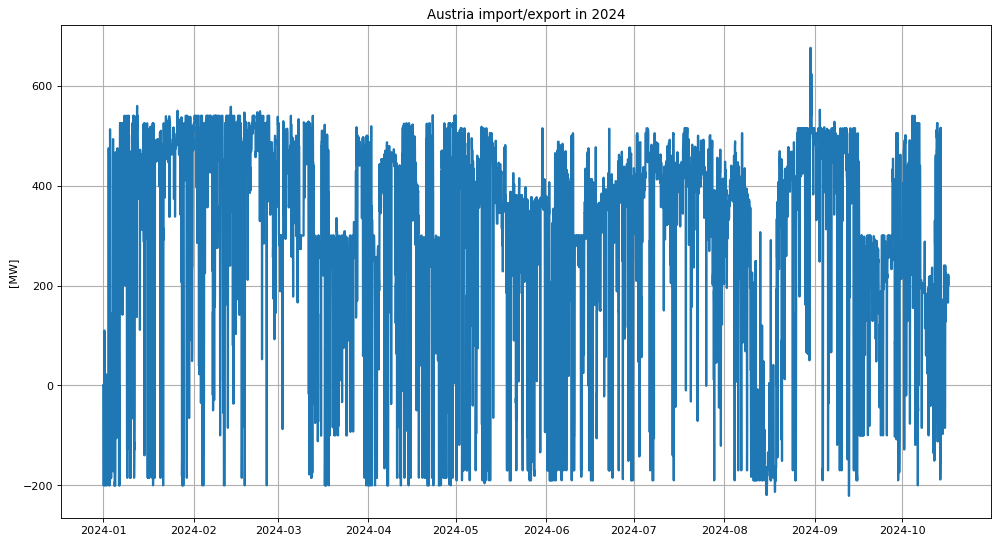

In [91]:
import matplotlib.pyplot as plt

DPI = 80
fig, ax = plt.subplots(figsize=[15,8], dpi=DPI)
ax.plot(austria_scheduled["SCHEDULED_FOREIGN_EXCHANGE_MW"].loc["2024"], linewidth=2) 

ax.set_title("Austria import/export in 2024"); ax.set_ylabel("[MW]")
ax.grid(True, which='both',  linewidth=1)
plt.show()

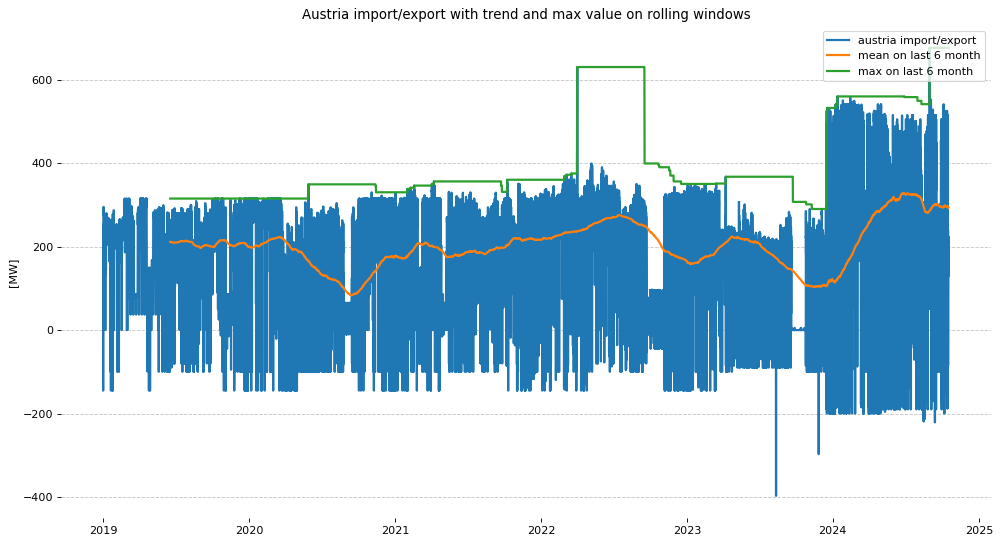

In [92]:
fig, ax = plt.subplots(figsize=[15,8], dpi=DPI)
ax.plot(austria_scheduled["SCHEDULED_FOREIGN_EXCHANGE_MW"], linewidth=2, label = 'austria import/export') 
ax.plot(austria_scheduled["SCHEDULED_FOREIGN_EXCHANGE_MW"].rolling(24*7*4*6, center=False).mean(), linewidth=2, label = 'mean on last 6 month') 
ax.plot(austria_scheduled["SCHEDULED_FOREIGN_EXCHANGE_MW"].rolling(24*7*4*6, center=False).max(), linewidth=2, label = 'max on last 6 month') 
# Hide specific plot spines
ax.spines["left"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.spines["bottom"].set_visible(False)

ax.grid(True, axis='y', linestyle='--', alpha=0.7)
ax.set_title("Austria import/export with trend and max value on rolling windows"); ax.set_ylabel("[MW]")
ax.legend(loc='upper right')
plt.show()

### CORSICA

In [93]:
corsica_scheduled = utils.filter_scheduled_foreign_exchange(scheduled_forex, 'Corsica')
corsica_scheduled = corsica_scheduled.drop(columns=['COUNTRY'])
corsica_scheduled

,SCHEDULED_FOREIGN_EXCHANGE_MW
ORAINI,
2019-01-01 00:00:00,-148.0
2019-01-01 01:00:00,-148.0
2019-01-01 02:00:00,-139.0
2019-01-01 03:00:00,-132.0
2019-01-01 04:00:00,-128.0
...,...
2024-10-16 19:00:00,-56.0
2024-10-16 20:00:00,-51.0
2024-10-16 21:00:00,-41.0


In [94]:
print("Macro-scale descriptive stats: CORSICA")
print(corsica_scheduled["SCHEDULED_FOREIGN_EXCHANGE_MW"].describe(),"\n")

Macro-scale descriptive stats: CORSICA
count    50778.000000
mean       -88.492241
std         37.078725
min       -148.000000
25%       -115.000000
50%        -92.000000
75%        -64.000000
max          0.000000
Name: SCHEDULED_FOREIGN_EXCHANGE_MW, dtype: float64 



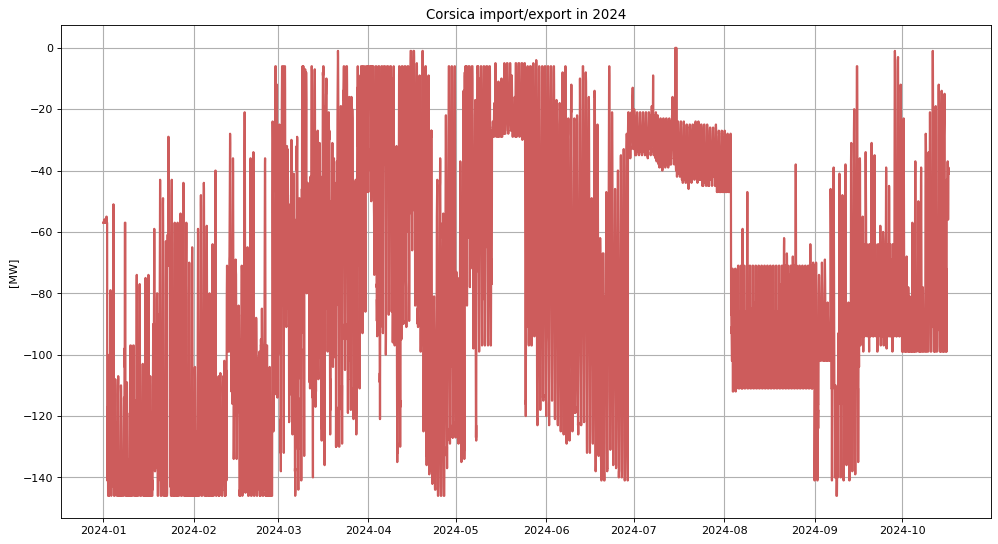

In [95]:
fig, ax = plt.subplots(figsize=[15,8], dpi=DPI)
ax.plot(corsica_scheduled["SCHEDULED_FOREIGN_EXCHANGE_MW"].loc["2024"], linewidth=2, color = 'indianred') 

ax.set_title("Corsica import/export in 2024"); ax.set_ylabel("[MW]")
ax.grid(True, which='both',  linewidth=1)
plt.show()

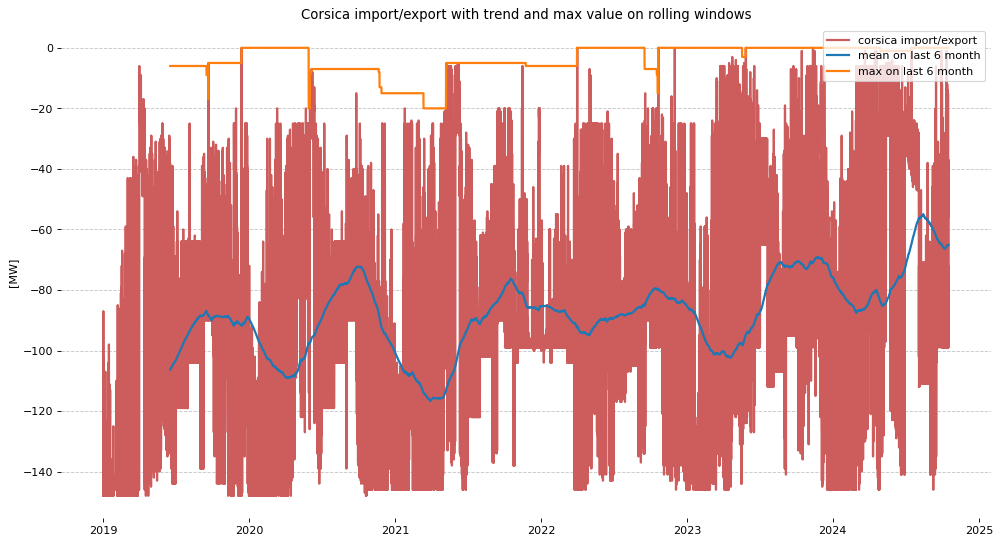

In [96]:
fig, ax = plt.subplots(figsize=[15,8], dpi=DPI)
ax.plot(corsica_scheduled["SCHEDULED_FOREIGN_EXCHANGE_MW"], linewidth=2, label = 'corsica import/export', color = 'indianred') 
ax.plot(corsica_scheduled["SCHEDULED_FOREIGN_EXCHANGE_MW"].rolling(24*7*4*6, center=False).mean(), linewidth=2, label = 'mean on last 6 month') 
ax.plot(corsica_scheduled["SCHEDULED_FOREIGN_EXCHANGE_MW"].rolling(24*7*4*6, center=False).max(), linewidth=2, label = 'max on last 6 month') 
# Hide specific plot spines
ax.spines["left"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.spines["bottom"].set_visible(False)

ax.grid(True, axis='y', linestyle='--', alpha=0.7)
ax.set_title("Corsica import/export with trend and max value on rolling windows"); ax.set_ylabel("[MW]")
ax.legend(loc='upper right')
plt.show()

### FRANCE

In [97]:
france_scheduled = utils.filter_scheduled_foreign_exchange(scheduled_forex, 'France')
france_scheduled = france_scheduled.drop(columns=['COUNTRY'])
france_scheduled

,SCHEDULED_FOREIGN_EXCHANGE_MW
ORAINI,
2019-01-01 00:00:00,-456.0
2019-01-01 01:00:00,-709.0
2019-01-01 02:00:00,-52.0
2019-01-01 03:00:00,-9.0
2019-01-01 04:00:00,-1160.0
...,...
2024-10-16 19:00:00,2410.1
2024-10-16 20:00:00,2774.0
2024-10-16 21:00:00,2721.0


In [98]:
print("Macro-scale descriptive stats: FRANCE")
print(france_scheduled["SCHEDULED_FOREIGN_EXCHANGE_MW"].describe(),"\n")

Macro-scale descriptive stats: FRANCE
count    50778.000000
mean      2103.667338
std       1106.661370
min      -1660.000000
25%       1544.000000
50%       2364.000000
75%       2866.975000
max       4947.000000
Name: SCHEDULED_FOREIGN_EXCHANGE_MW, dtype: float64 



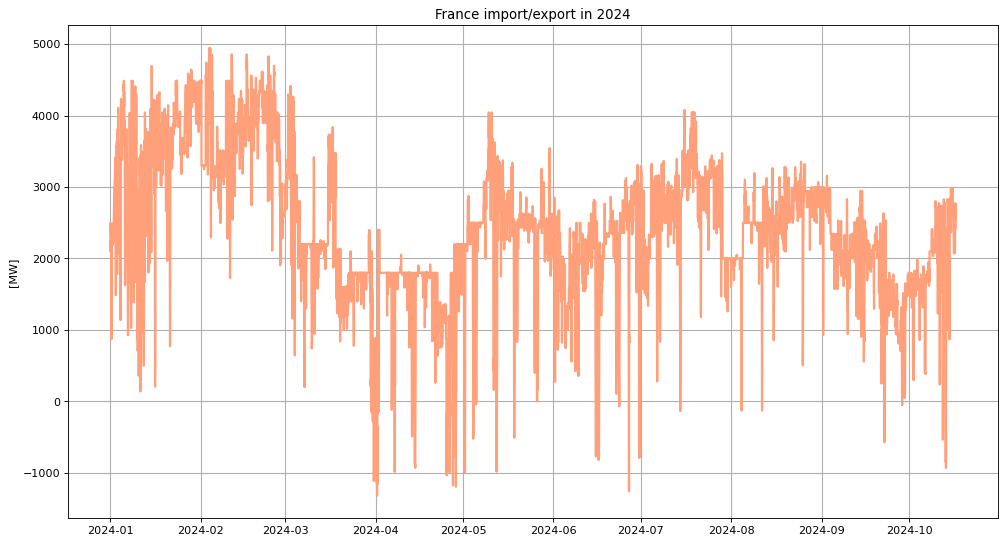

In [99]:
fig, ax = plt.subplots(figsize=[15,8], dpi=DPI)
ax.plot(france_scheduled["SCHEDULED_FOREIGN_EXCHANGE_MW"].loc["2024"], linewidth=2, color = 'lightsalmon') 

ax.set_title("France import/export in 2024"); ax.set_ylabel("[MW]")
ax.grid(True, which='both',  linewidth=1)
plt.show()

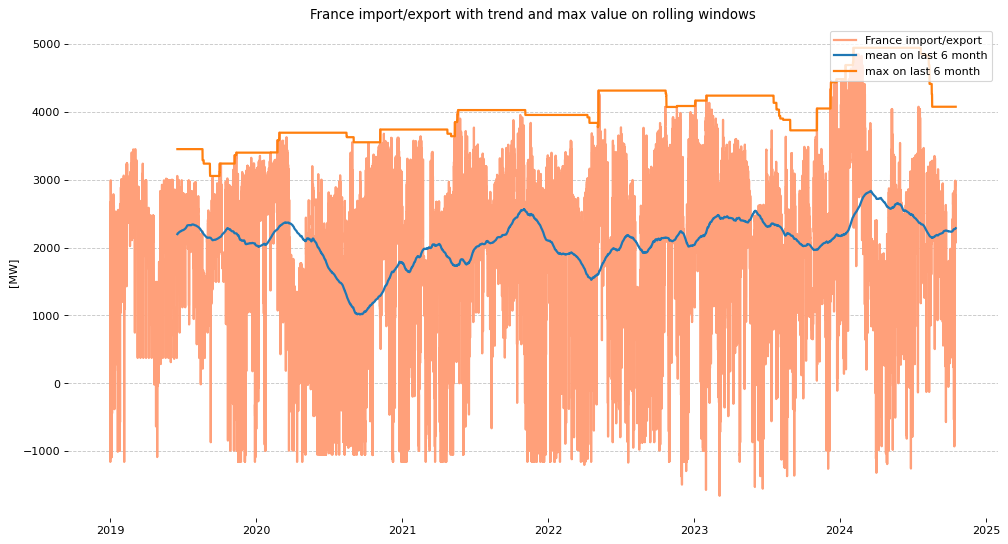

In [100]:
fig, ax = plt.subplots(figsize=[15,8], dpi=DPI)
ax.plot(france_scheduled["SCHEDULED_FOREIGN_EXCHANGE_MW"], linewidth=2, label = 'France import/export', color = 'lightsalmon') 
ax.plot(france_scheduled["SCHEDULED_FOREIGN_EXCHANGE_MW"].rolling(24*7*4*6, center=False).mean(), linewidth=2, label = 'mean on last 6 month') 
ax.plot(france_scheduled["SCHEDULED_FOREIGN_EXCHANGE_MW"].rolling(24*7*4*6, center=False).max(), linewidth=2, label = 'max on last 6 month') 
# Hide specific plot spines
ax.spines["left"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.spines["bottom"].set_visible(False)

ax.grid(True, axis='y', linestyle='--', alpha=0.7)
ax.set_title("France import/export with trend and max value on rolling windows"); ax.set_ylabel("[MW]")
ax.legend(loc='upper right')
plt.show()

### SLOVENIA

In [101]:
slovenia_scheduled = utils.filter_scheduled_foreign_exchange(scheduled_forex, 'Slovenia')
slovenia_scheduled = slovenia_scheduled.drop(columns=['COUNTRY'])
slovenia_scheduled

,SCHEDULED_FOREIGN_EXCHANGE_MW
ORAINI,
2019-01-01 00:00:00,-377.0
2019-01-01 01:00:00,-214.0
2019-01-01 02:00:00,-561.0
2019-01-01 03:00:00,-184.0
2019-01-01 04:00:00,433.0
...,...
2024-10-16 19:00:00,634.3
2024-10-16 20:00:00,700.0
2024-10-16 21:00:00,686.0


In [102]:
print("Macro-scale descriptive stats: SLOVENIA")
print(slovenia_scheduled["SCHEDULED_FOREIGN_EXCHANGE_MW"].describe(),"\n")

Macro-scale descriptive stats: SLOVENIA
count    50778.000000
mean       242.111194
std        427.890872
min      -1116.000000
25%         -6.000000
50%        403.000000
75%        580.250000
max       1119.700000
Name: SCHEDULED_FOREIGN_EXCHANGE_MW, dtype: float64 



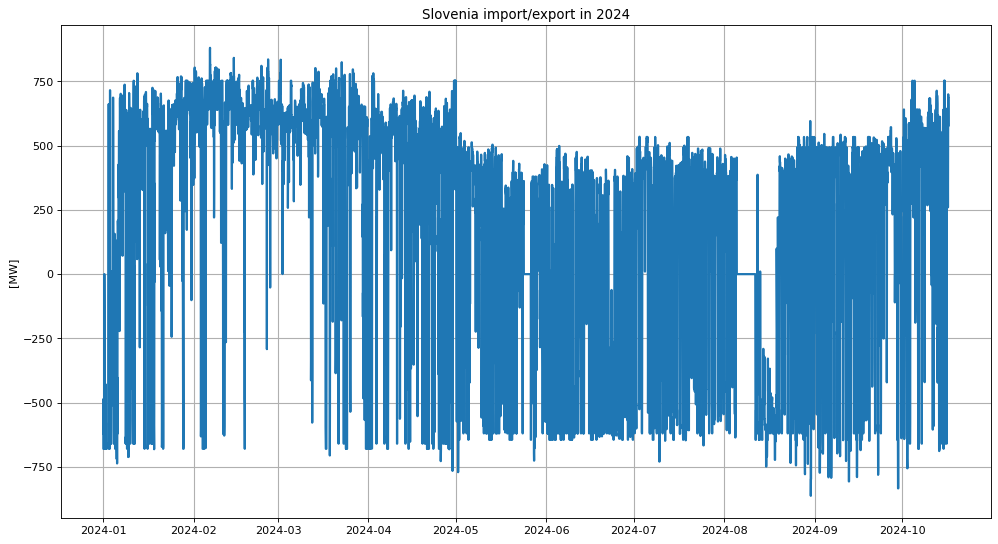

In [103]:
fig, ax = plt.subplots(figsize=[15,8], dpi=DPI)
ax.plot(slovenia_scheduled["SCHEDULED_FOREIGN_EXCHANGE_MW"].loc["2024"], linewidth=2) 

ax.set_title("Slovenia import/export in 2024"); ax.set_ylabel("[MW]")
ax.grid(True, which='both',  linewidth=1)
plt.show()

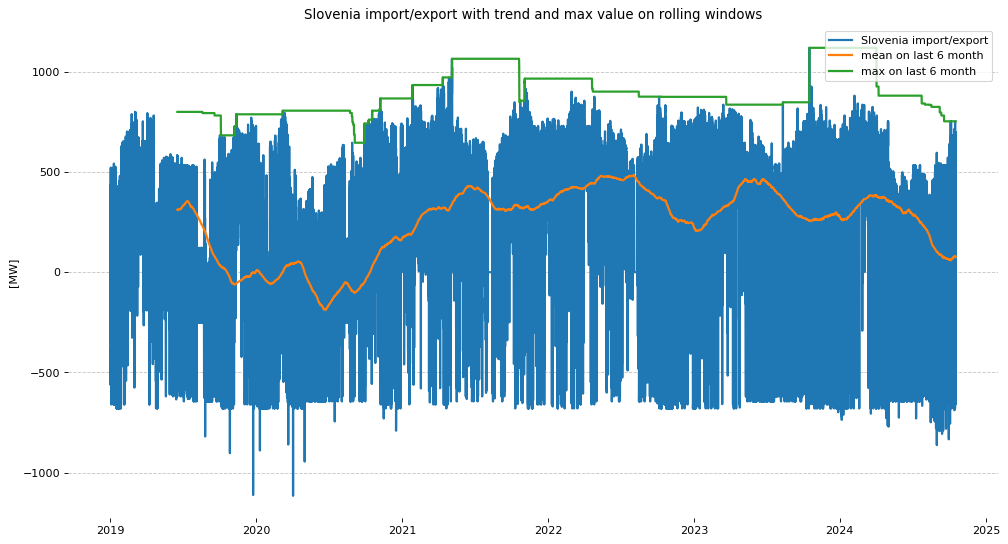

In [104]:
fig, ax = plt.subplots(figsize=[15,8], dpi=DPI)
ax.plot(slovenia_scheduled["SCHEDULED_FOREIGN_EXCHANGE_MW"], linewidth=2, label = 'Slovenia import/export') 
ax.plot(slovenia_scheduled["SCHEDULED_FOREIGN_EXCHANGE_MW"].rolling(24*7*4*6, center=False).mean(), linewidth=2, label = 'mean on last 6 month') 
ax.plot(slovenia_scheduled["SCHEDULED_FOREIGN_EXCHANGE_MW"].rolling(24*7*4*6, center=False).max(), linewidth=2, label = 'max on last 6 month') 
# Hide specific plot spines
ax.spines["left"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.spines["bottom"].set_visible(False)

ax.grid(True, axis='y', linestyle='--', alpha=0.7)
ax.set_title("Slovenia import/export with trend and max value on rolling windows"); ax.set_ylabel("[MW]")
ax.legend(loc='upper right')
plt.show()

### GREECE

In [105]:
greece_scheduled = utils.filter_scheduled_foreign_exchange(scheduled_forex, 'Greece')
greece_scheduled = greece_scheduled.drop(columns=['COUNTRY'])
greece_scheduled

,SCHEDULED_FOREIGN_EXCHANGE_MW
ORAINI,
2019-01-01 00:00:00,-310.0
2019-01-01 01:00:00,-298.0
2019-01-01 02:00:00,-216.0
2019-01-01 03:00:00,-211.0
2019-01-01 04:00:00,-206.0
...,...
2024-10-16 19:00:00,387.6
2024-10-16 20:00:00,500.0
2024-10-16 21:00:00,500.0


In [106]:
print("Macro-scale descriptive stats: GREECE")
print(greece_scheduled["SCHEDULED_FOREIGN_EXCHANGE_MW"].describe(),"\n")

Macro-scale descriptive stats: GREECE
count    50778.000000
mean        -7.021864
std        378.792539
min       -594.700000
25%       -404.000000
50%          0.000000
75%        435.200000
max       1027.000000
Name: SCHEDULED_FOREIGN_EXCHANGE_MW, dtype: float64 



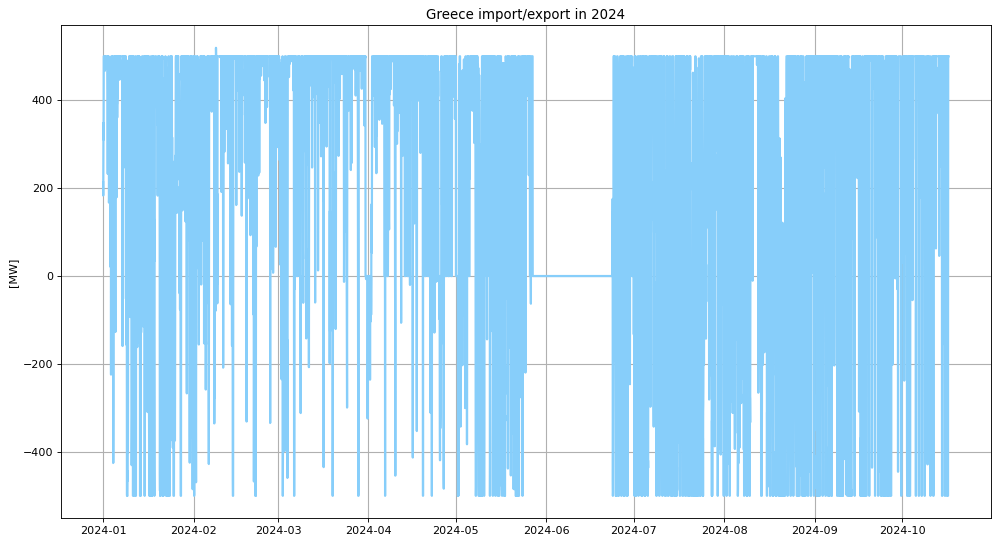

In [107]:
fig, ax = plt.subplots(figsize=[15,8], dpi=DPI)
ax.plot(greece_scheduled["SCHEDULED_FOREIGN_EXCHANGE_MW"].loc["2024"], linewidth=2, color = 'lightskyblue') 

ax.set_title("Greece import/export in 2024"); ax.set_ylabel("[MW]")
ax.grid(True, which='both',  linewidth=1)
plt.show()

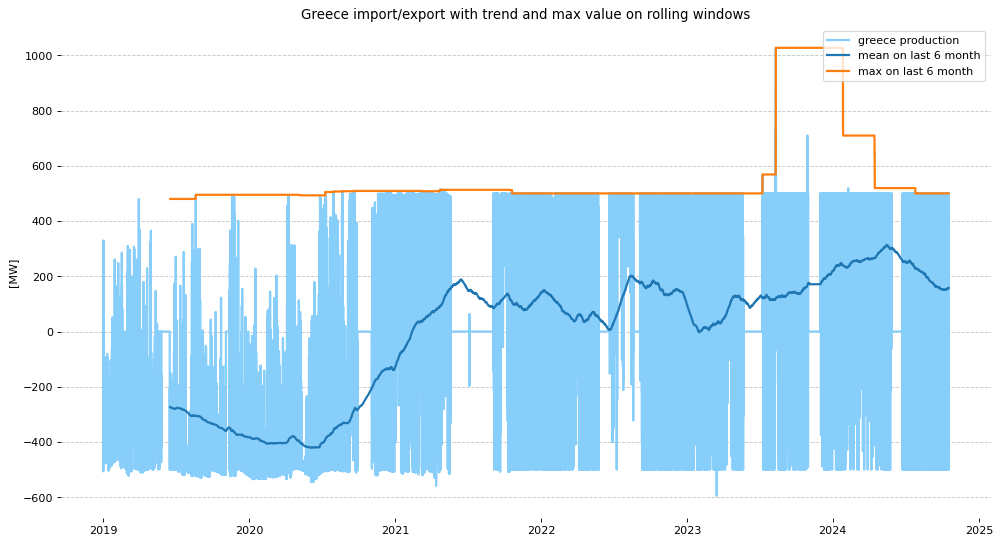

In [108]:
fig, ax = plt.subplots(figsize=[15,8], dpi=DPI)
ax.plot(greece_scheduled["SCHEDULED_FOREIGN_EXCHANGE_MW"], linewidth=2, label = 'greece production', color = 'lightskyblue') 
ax.plot(greece_scheduled["SCHEDULED_FOREIGN_EXCHANGE_MW"].rolling(24*7*4*6, center=False).mean(), linewidth=2, label = 'mean on last 6 month') 
ax.plot(greece_scheduled["SCHEDULED_FOREIGN_EXCHANGE_MW"].rolling(24*7*4*6, center=False).max(), linewidth=2, label = 'max on last 6 month') 
# Hide specific plot spines
ax.spines["left"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.spines["bottom"].set_visible(False)

ax.grid(True, axis='y', linestyle='--', alpha=0.7)
ax.set_title("Greece import/export with trend and max value on rolling windows"); ax.set_ylabel("[MW]")
ax.legend(loc='upper right')
plt.show()

### SWITZERLAND

In [109]:
switzerland_scheduled = utils.filter_scheduled_foreign_exchange(scheduled_forex, 'Switzerland')
switzerland_scheduled = switzerland_scheduled.drop(columns=['COUNTRY'])
switzerland_scheduled

,SCHEDULED_FOREIGN_EXCHANGE_MW
ORAINI,
2019-01-01 00:00:00,2413.0
2019-01-01 01:00:00,2217.0
2019-01-01 02:00:00,1956.0
2019-01-01 03:00:00,2162.0
2019-01-01 04:00:00,2227.0
...,...
2024-10-16 19:00:00,2630.0
2024-10-16 20:00:00,2902.0
2024-10-16 21:00:00,2845.0


In [110]:
print("Macro-scale descriptive stats: SWITZERLAND")
print(switzerland_scheduled["SCHEDULED_FOREIGN_EXCHANGE_MW"].describe(),"\n")

Macro-scale descriptive stats: SWITZERLAND
count    50778.000000
mean      2278.253151
std       1038.210127
min      -1910.000000
25%       1679.475000
50%       2364.000000
75%       2941.000000
max       4977.000000
Name: SCHEDULED_FOREIGN_EXCHANGE_MW, dtype: float64 



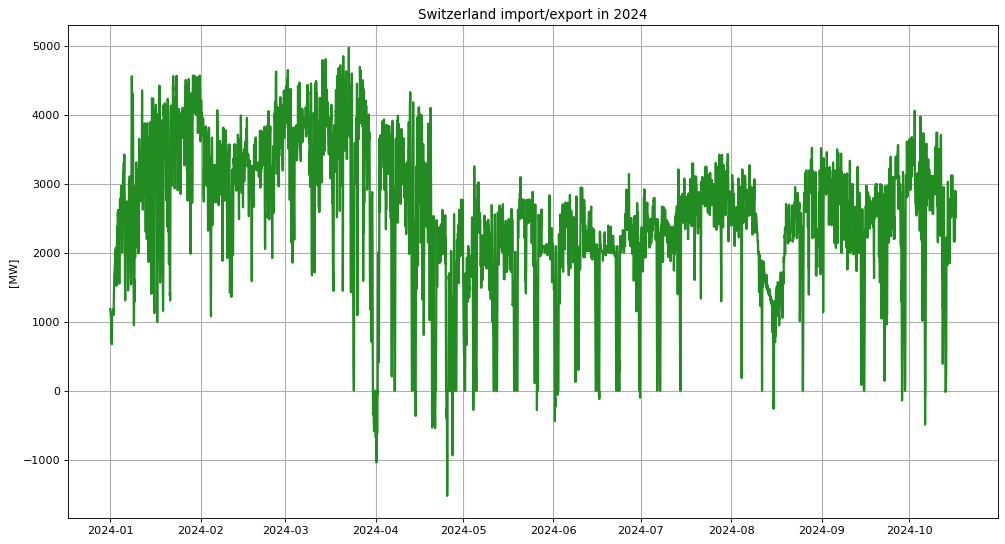

In [111]:
fig, ax = plt.subplots(figsize=[15,8], dpi=DPI)
ax.plot(switzerland_scheduled["SCHEDULED_FOREIGN_EXCHANGE_MW"].loc["2024"], linewidth=2, color = 'forestgreen') 

ax.set_title("Switzerland import/export in 2024"); ax.set_ylabel("[MW]")
ax.grid(True, which='both',  linewidth=1)
plt.show()

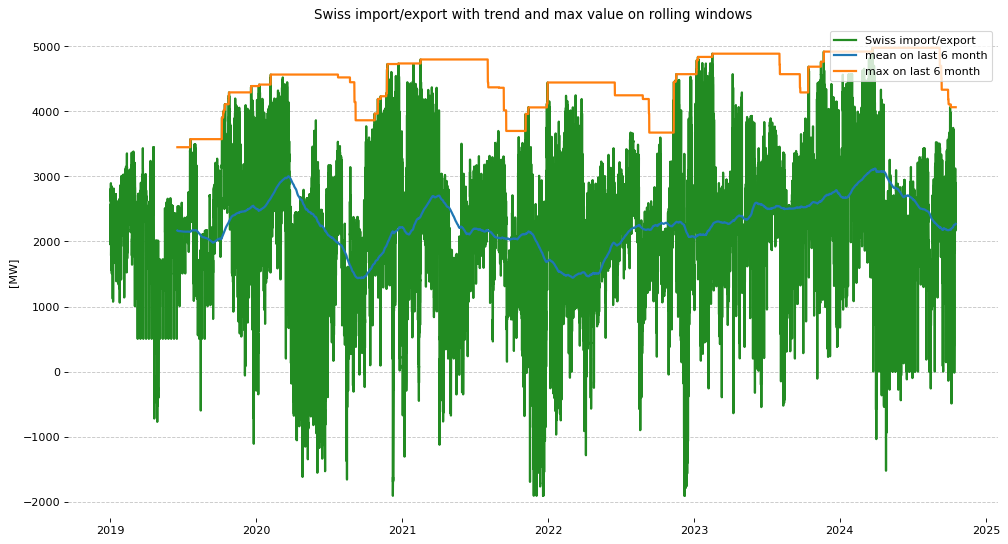

In [112]:
fig, ax = plt.subplots(figsize=[15,8], dpi=DPI)
ax.plot(switzerland_scheduled["SCHEDULED_FOREIGN_EXCHANGE_MW"], linewidth=2, label = 'Swiss import/export', color = 'forestgreen') 
ax.plot(switzerland_scheduled["SCHEDULED_FOREIGN_EXCHANGE_MW"].rolling(24*7*4*6, center=False).mean(), linewidth=2, label = 'mean on last 6 month') 
ax.plot(switzerland_scheduled["SCHEDULED_FOREIGN_EXCHANGE_MW"].rolling(24*7*4*6, center=False).max(), linewidth=2, label = 'max on last 6 month') 
# Hide specific plot spines
ax.spines["left"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.spines["bottom"].set_visible(False)

ax.grid(True, axis='y', linestyle='--', alpha=0.7)
ax.set_title("Swiss import/export with trend and max value on rolling windows"); ax.set_ylabel("[MW]")
ax.legend(loc='upper right')
plt.show()